# Notebook 02: Exploratory Data Analysis (EDA)

Let's start with some useful explorations of the data.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Matplotlib darkmode
plt.style.use('dark_background')

In [2]:
df = pd.read_csv("../data/data_preprocessed.csv")

Let's look at 4 different problematic events that the discover methods found in searching for the exoplanet.

In [3]:
df.groupby("koi_fpflag_nt").size().reset_index(name="count")

,koi_fpflag_nt,count
0,0,7165
1,1,828


In [4]:
df.groupby("koi_fpflag_co").size().reset_index(name="count")

,koi_fpflag_co,count
0,0,6222
1,1,1771


In [5]:
df.groupby("koi_fpflag_ec").size().reset_index(name="count")

,koi_fpflag_ec,count
0,0,6912
1,1,1081


In [6]:
df.groupby("koi_fpflag_ss").size().reset_index(name="count")

,koi_fpflag_ss,count
0,0,5848
1,1,2145


fpflag_ss seems to be the one most found. It describes a KOI that is observed to have a significant secondary event, transit shape, or out-of-eclipse variability, which indicates that the transit-like event is most likely caused by an eclipsing binary.

## Analyzing the approximated temperature of the exoplanet (in Kelvin):

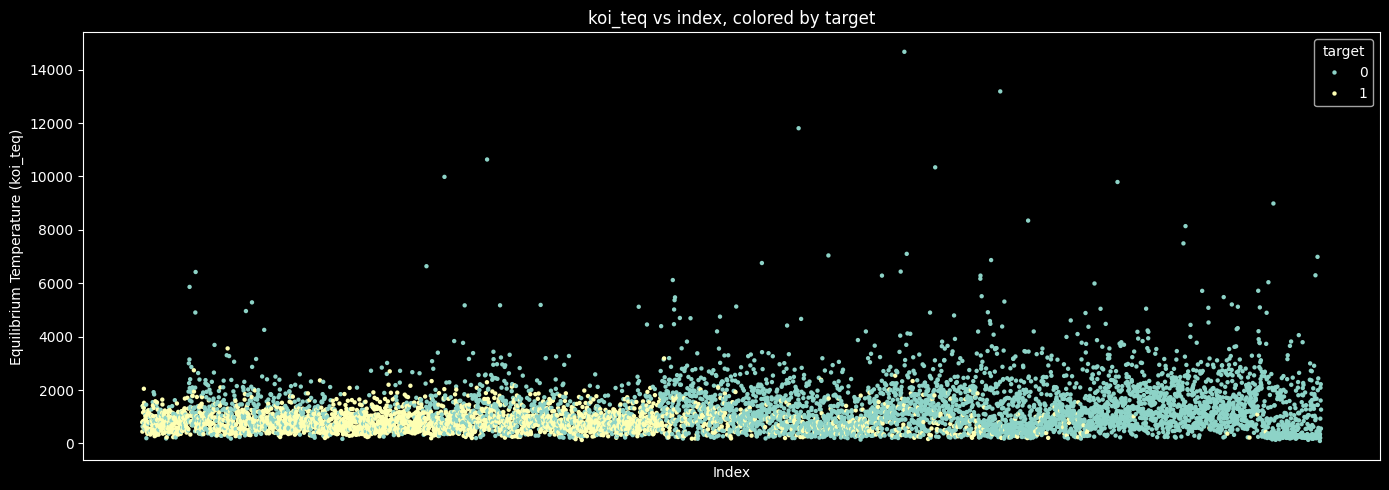

In [7]:
# Ensure target is categorical
df["target"] = df["target"].astype("category")

# Create ID column
df["id"] = df.index.astype(str)

plt.figure(figsize=(14,5))
sns.scatterplot(
    data=df,
    x="id",
    y="koi_teq",
    hue="target",
    s=10,          # point size similar to 0.5 in ggplot
    linewidth=0
)

plt.xticks([], [])   # hide x-labels (too many IDs)
plt.xlabel("Index")
plt.ylabel("Equilibrium Temperature (koi_teq)")
plt.title("koi_teq vs index, colored by target")
plt.tight_layout()
plt.show()

In [8]:
df.groupby("target")["koi_teq"].agg(["mean", "median"])


/tmp/ipykernel_437602/642359104.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("target")["koi_teq"].agg(["mean", "median"])


,mean,median
target,,
0,1302.275541,1098.0
1,832.736340,778.0


There is not a clear pattern, even though from median and mean we can see that higher temperatures seem to refer to rejected exoplanet. 

We are going to use the same method to analyze the stellar effective temperature (in Kelvin):

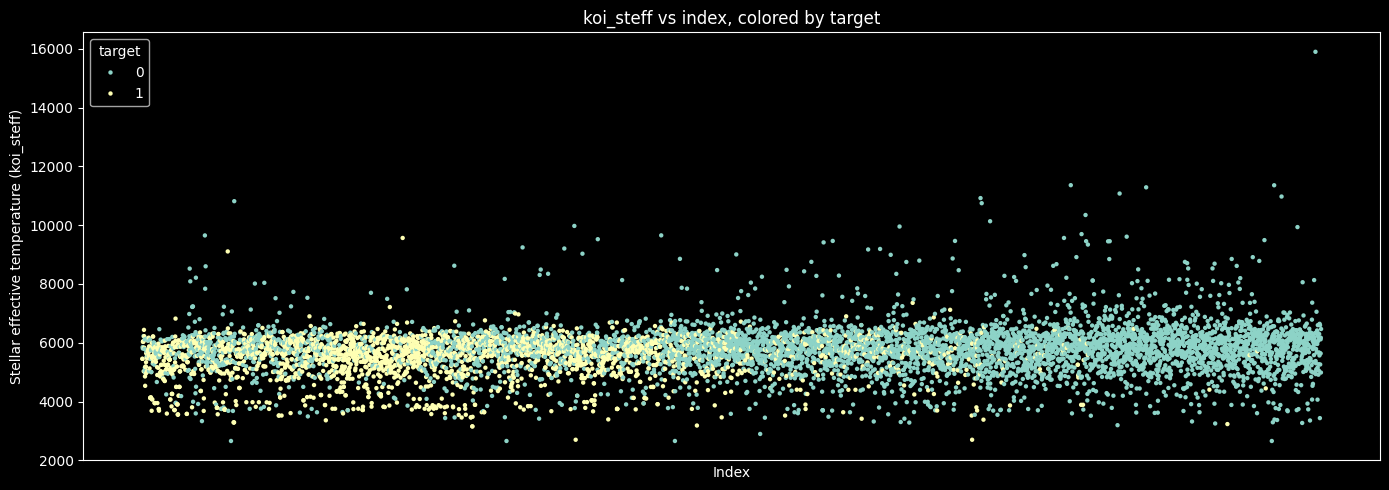

In [9]:
plt.figure(figsize=(14,5))
sns.scatterplot(
    data=df,
    x="id",
    y="koi_steff",
    hue="target",
    s=10,          # point size similar to 0.5 in ggplot
    linewidth=0
)

plt.xticks([], [])   # hide x-labels (too many IDs)
plt.xlabel("Index")
plt.ylabel("Stellar effective temperature (koi_steff)")
plt.title("koi_steff vs index, colored by target")
plt.tight_layout()
plt.show()

In [10]:
df.groupby("target")["koi_steff"].agg(["mean", "median"])

/tmp/ipykernel_437602/155020706.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("target")["koi_steff"].agg(["mean", "median"])


,mean,median
target,,
0,5800.576719,5813.0
1,5480.800880,5616.0


There is a slight difference between the judged exoplanet and not. This difference is mainly shown in the mean, symptom that it is influeced by outliers.


Let's analyze the stars magnitude (brightness).

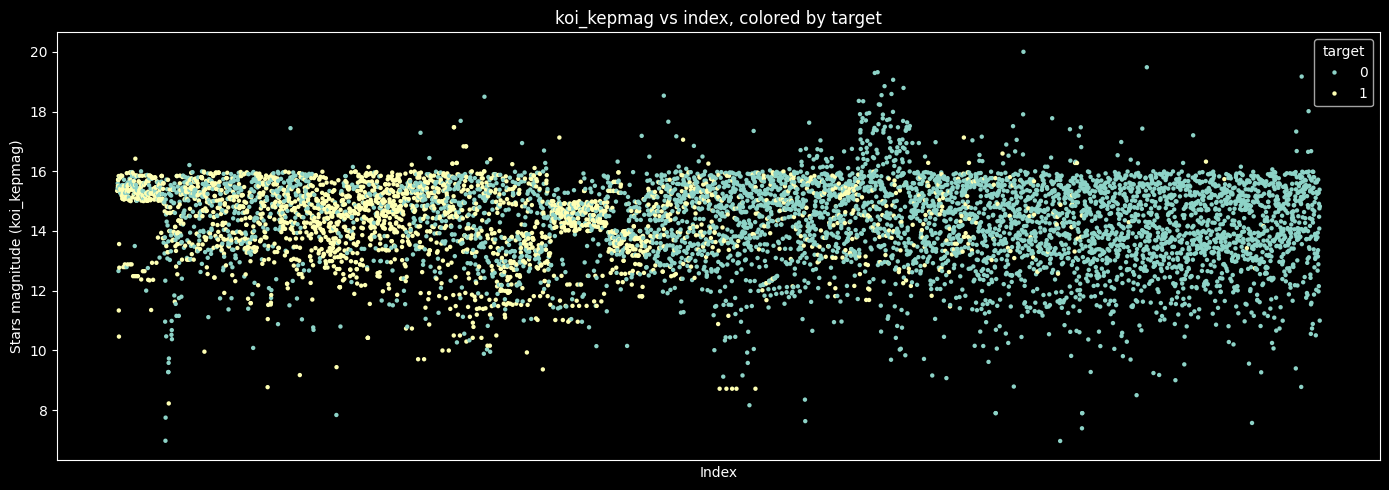

In [11]:
plt.figure(figsize=(14,5))
sns.scatterplot(
    data=df,
    x="id",
    y="koi_kepmag",
    hue="target",
    s=10,          # point size similar to 0.5 in ggplot
    linewidth=0
)

plt.xticks([], [])   # hide x-labels (too many IDs)
plt.xlabel("Index")
plt.ylabel("Stars magnitude (koi_kepmag)")
plt.title("koi_kepmag vs index, colored by target")
plt.tight_layout()
plt.show()

In [12]:
df.groupby("target")["koi_kepmag"].agg(["mean", "median"])

/tmp/ipykernel_437602/2973373291.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("target")["koi_kepmag"].agg(["mean", "median"])


,mean,median
target,,
0,14.294759,14.5495
1,14.362388,14.6190


Graph and summary statistics do not show significant difference in stars magnitude between what we consider exoplanet and not.


Let's do the same process for the planetary radius expressed as fraction of earth radii:

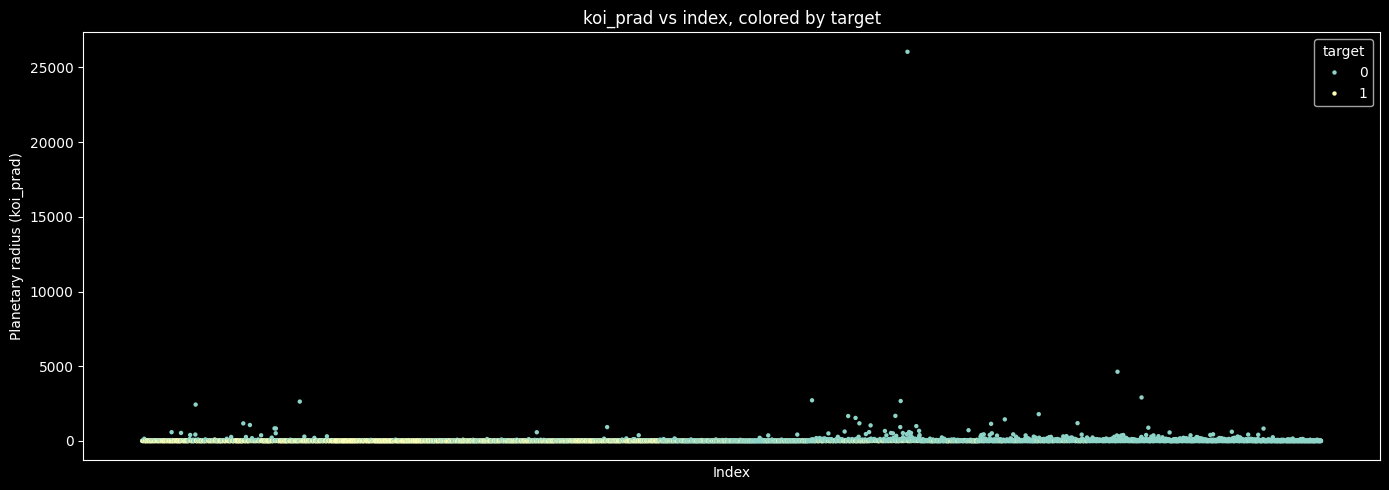

In [13]:
plt.figure(figsize=(14,5))
sns.scatterplot(
    data=df,
    x="id",
    y="koi_prad",
    hue="target",
    s=10,          # point size similar to 0.5 in ggplot
    linewidth=0
)

plt.xticks([], [])   # hide x-labels (too many IDs)
plt.xlabel("Index")
plt.ylabel("Planetary radius (koi_prad)")
plt.title("koi_prad vs index, colored by target")
plt.tight_layout()
plt.show()

In [14]:
df.groupby("target")["koi_prad"].agg(["mean", "median"])

/tmp/ipykernel_437602/1987376789.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("target")["koi_prad"].agg(["mean", "median"])


,mean,median
target,,
0,40.900771,3.865
1,2.857770,2.160


The presence of outliers leads to significant difference between exoplanet and not, especially in the mean.


Let's visualize now the KOI position on the celestial sphere in the equatorial coordinate system:

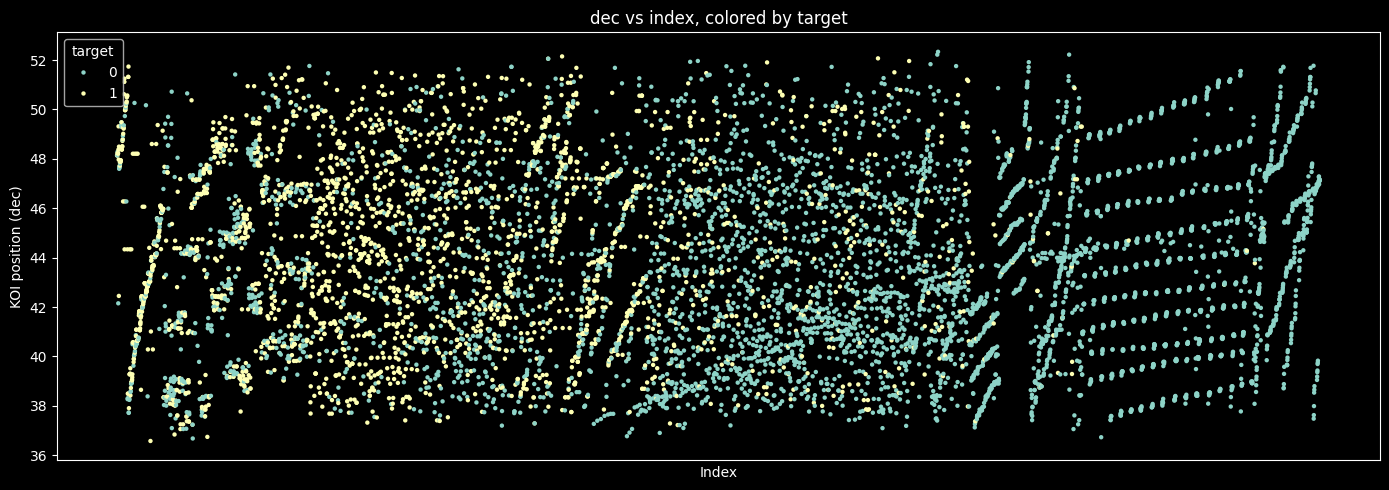

In [15]:
plt.figure(figsize=(14,5))
sns.scatterplot(
    data=df,
    x="id",
    y="dec",
    hue="target",
    s=10,          # point size similar to 0.5 in ggplot
    linewidth=0
)

plt.xticks([], [])   # hide x-labels (too many IDs)
plt.xlabel("Index")
plt.ylabel("KOI position (dec)")
plt.title("dec vs index, colored by target")
plt.tight_layout()
plt.show()

Finally, we can observe the target variable:

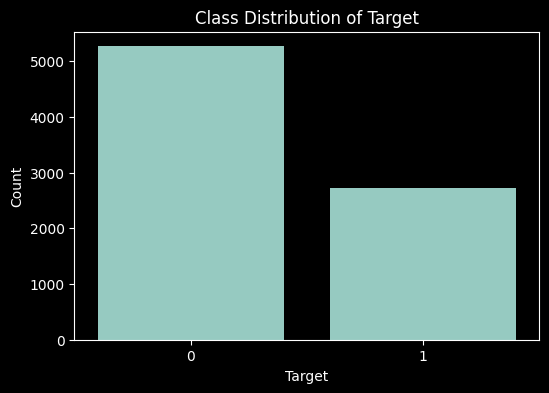

In [16]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="target")
plt.title("Class Distribution of Target")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()

In [17]:
df["target"].value_counts().reset_index(name="count")

,target,count
0,0,5266
1,1,2727


As shown in both the histogram and the summary table, the target variable is imbalanced: class **1 (confirmed planets)** represents roughly **30%** of the dataset.
This imbalance may affect model performance—especially recall for the minority class—so techniques such as **oversampling, undersampling, or class weighting** may be needed.

